In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np


In [19]:
df = pd.read_csv("D:/University/third_course/MTAD/lab2/cleaned_data.csv")

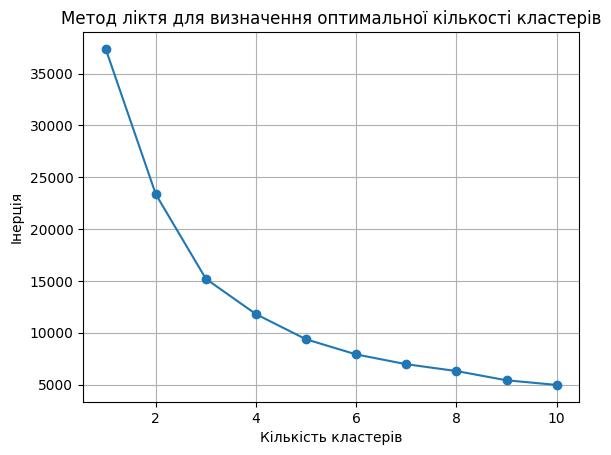

In [20]:
df.columns
# Вибір ознак
x1 = 'Danceability'
x2 = 'Loudness'
X = df[[x1, x2]]

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df[f'{x1}_scaled'] = X_scaled[:, 0]
df[f'{x2}_scaled'] = X_scaled[:, 1]

# 1. Визначення оптимальної кількості кластерів (Метод ліктя)
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Побудова графіку методу ліктя
plt.plot(cluster_range, inertia, marker='o')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.grid(True)
plt.show()


In [21]:
# 2. Застосування K-Means з оптимальною кількістю кластерів
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_


In [22]:
df

,Unnamed: 0,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,...,Views,Likes,Comments,Description,Licensed,official_video,Stream,Danceability_scaled,Loudness_scaled,Cluster
0,0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,...,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,1.198765,0.175395,1
1,1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,...,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,0.312853,0.388378,1
2,2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,...,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,0.431390,0.853047,1
3,3,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,...,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08,0.231748,-0.304803,1
4,4,Gorillaz,DARE,Demon Days,album,0.760,0.891,11.0,-5.852,0.0372,...,259021161.0,1844658.0,72008.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,3.238503e+08,0.836913,0.379258,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18683,18683,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,...,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06,-0.273596,0.257976,0
18684,18684,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,...,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07,-0.591776,1.381561,0
18685,18685,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,...,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06,-1.140792,0.668412,0
18686,18686,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,...,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06,-1.303001,0.834805,0


In [23]:
df[df['Cluster'] != 2][['Track','Danceability_scaled', 'Loudness_scaled', 'Cluster']].to_csv('kmeans.csv', index=False)

In [24]:
# 3. Виведення центрів кластерів та кількості елементів у кожному кластері
centers = kmeans.cluster_centers_
cluster_info = pd.DataFrame(centers, columns=[x1, x2])
cluster_info['Number of elements'] = np.bincount(kmeans.labels_)
cluster_info


,Danceability,Loudness,Number of elements
0,-0.784111,0.200730,7214
1,0.751494,0.248481,9853
2,-1.081673,-2.408584,1621


In [25]:
7214+9853+1621

18688

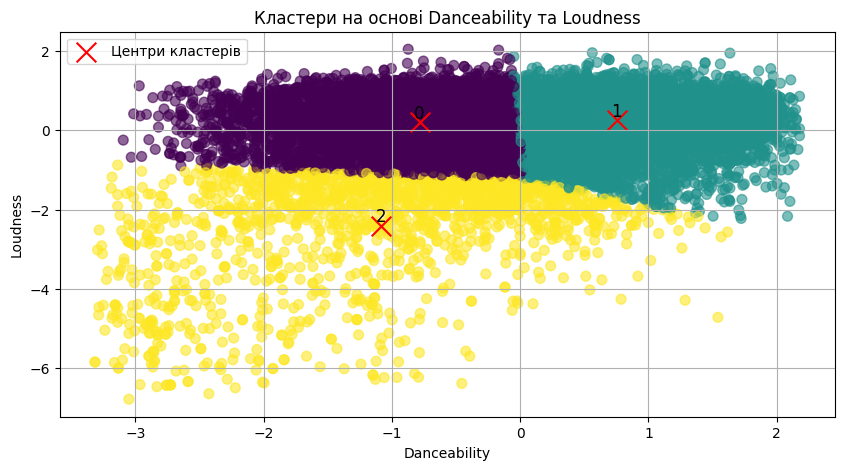

In [26]:
# 4. Візуалізація кластерів
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='x', label='Центри кластерів')
for i, center in enumerate(centers):
    plt.text(center[0], center[1], f'{i}', fontsize=12, color='black', ha='center', va='bottom')
plt.title(f'Кластери на основі {x1} та {x2}')
plt.xlabel(x1)
plt.ylabel(x2)
plt.legend()
plt.grid(True)
plt.show()

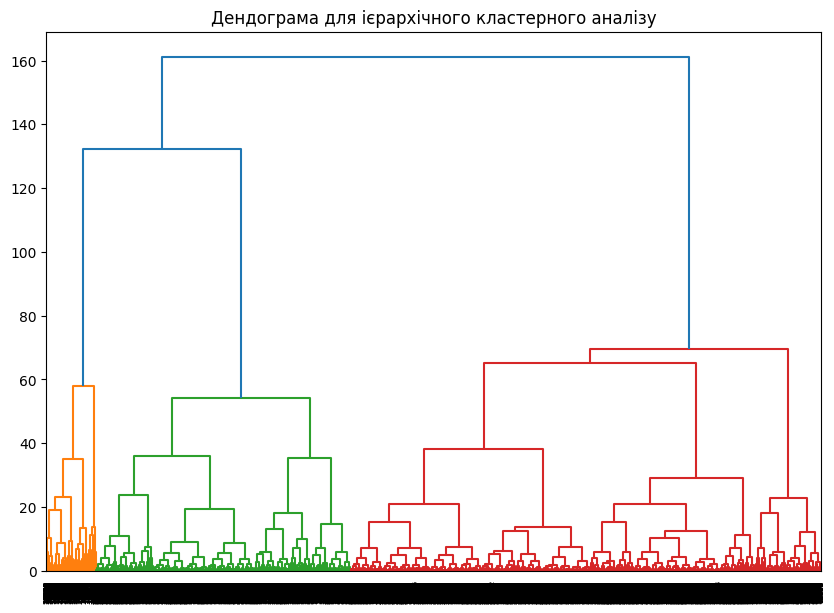

In [27]:
# Створення дендограми
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Дендограма для ієрархічного кластерного аналізу')
plt.show()

In [28]:
optimal_clusters_hierarchical = 3

# Ієрархічна кластеризація
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_clusters_hierarchical)
df['Hierarchical_Cluster'] = hierarchical_clustering.fit_predict(X_scaled)

# Кількість елементів у кожному кластері для ієрархічної кластеризації
hierarchical_cluster_sizes = np.bincount(df['Hierarchical_Cluster'])

In [29]:
hierarchical_cluster_sizes

array([11350,  1207,  6131])

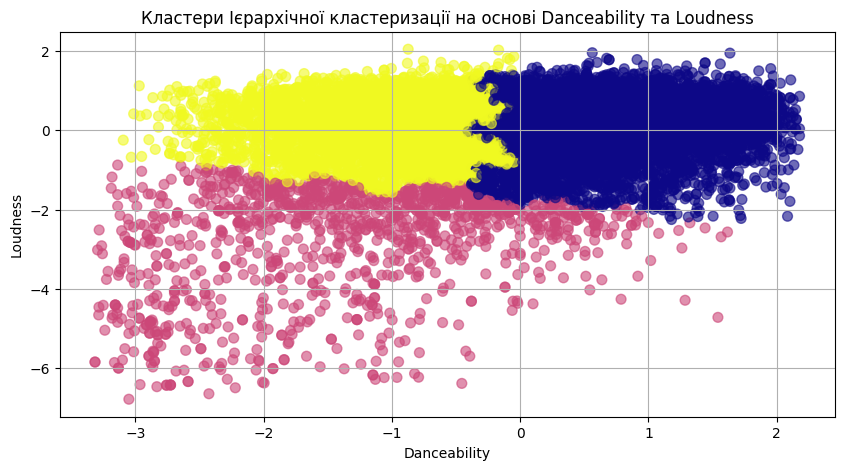

In [30]:
# Візуалізація кластерів для ієрархічної кластеризації
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Hierarchical_Cluster'], cmap='plasma', marker='o', s=50, alpha=0.6)
plt.title(f'Кластери Ієрархічної кластеризації на основі {x1} та {x2}')
plt.xlabel(f'{x1}')
plt.ylabel(f'{x2}')
plt.grid(True)
plt.show()